In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from hardwares.hardware_params import hardware_params
from model_analyzer import ModelAnalyzer
%load_ext autoreload
%autoreload 2

In [30]:
import os
os.environ["https_proxy"]="127.0.0.1:7890"

model_id="meta-llama/Llama-2-13b-hf"
bandwidths=[]
performances=[]
for bandwidth_scale in np.linspace(1,20,20):
    hardware_name=f"h{bandwidth_scale}"
    bandwidth=200e9*bandwidth_scale
    hardware_params[hardware_name] = {"bandwidth": bandwidth, "FP16": 200e12, "onchip_buffer": 10240e3}
    analyzer=ModelAnalyzer(model_id,hardware_name)
    result=analyzer.analyze(1024,1)
    
    bandwidths.append(bandwidth)
    performances.append(result["total_results"]["decode"]["inference_time"])
throughput=1/np.array(performances)

use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2-13b-hf
use config file configs/Llama.py for meta-llama/Llama-2

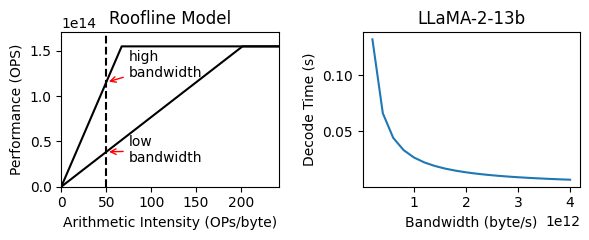

In [43]:
hardware="nvidia_A6000"
bandwidth = hardware_params[hardware]["bandwidth"]
max_OPS = hardware_params[hardware]["FP16"]

fig=plt.figure(figsize=(6, 2.5))
plt.subplot(1, 2, 1)
y_max = max_OPS
turning_point = y_max / bandwidth

plt.plot(
    [0, turning_point/3, turning_point * 3], [0, y_max, y_max], color="black"
)
plt.plot(
    [0, turning_point, turning_point * 3], [0, y_max, y_max], color="black"
)
plt.xlabel("Arithmetic Intensity (OPs/byte)")
plt.ylabel("Performance (OPS)")

plt.ylim(0, y_max * 1.1)
plt.xlim(0, turning_point * 1.2)

plt.vlines(50, 0, max_OPS*2, color="black", linestyle="--")
plt.annotate(
    "low\nbandwidth",
    xy=(50, max_OPS*(50/(max_OPS / bandwidth))),
    xytext=(75, max_OPS*(50/(max_OPS / bandwidth))*0.7),
    arrowprops=dict(arrowstyle="->", color="red"),
)

# plt.vlines(180, 0, max_OPS*2, color="black", linestyle="--")
plt.annotate(
    "high\nbandwidth",
    xy=(50, max_OPS*(50*3/(max_OPS / bandwidth))),
    xytext=(75, max_OPS*(50*3/(max_OPS / bandwidth))*1.05),
    arrowprops=dict(arrowstyle="->", color="red"),
)
plt.title("Roofline Model")

plt.subplot(1, 2, 2)
plt.plot(
    bandwidths, performances
)
plt.xlabel("Bandwidth (byte/s)")
plt.ylabel("Decode Time (s)")

plt.title("LLaMA-2-13b")

plt.tight_layout()
# save pdf
plt.savefig(f"../output/hardware_bandwidth.pdf", bbox_inches="tight")